In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import squarify

# Read the CSV files
nodes_df = pd.read_csv('csv_data/final_entities.csv')
edges_df = pd.read_csv('csv_data/final_relations.csv')

# Initialize the directed graph
G = nx.DiGraph()

# Add nodes to the graph
for _, row in nodes_df.iterrows():
    G.add_node(row['EntityId'], 
               name=row['Name'], 
               type=row['Type'],
               also_known_as=row['AlsoKnownAs'], 
               wd_id=row['WDId'], 
               wd_url=row['WDUrl'], 
               wd_description=row['WDDescription'], 
               wd_source=row['WDSource'])

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['HeadId'], row['TailId'], weight=row['Weight'], type = row['Type'], relation_id=row['Relationid'])

In [2]:
# Print the number of nodes
print(f'''There are {G.number_of_nodes()} nodes and {G.number_of_edges()} edges in the graph''')

There are 6944 nodes and 10829 edges in the graph


In [3]:
# Print the density of the graph
print(f'''The network density is {round(nx.density(G), 5)} which is a reasonably high value for a network of this size''')

The network density is 0.00022 which is a reasonably high value for a network of this size


In [4]:
# Print the number of weakly connected components
print(f'''There are {nx.number_weakly_connected_components(G)} weakly connected components in the graph''')

There are 557 weakly connected components in the graph


In [5]:
# Get the number of nodes in the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)
percentage_in_largest_wcc = (len(largest_wcc) / G.number_of_nodes()) * 100

print(f'''{len(largest_wcc)} nodes occur in the largest weakly connected component, i.e. {percentage_in_largest_wcc:.2f}% are in this component''')


5645 nodes occur in the largest weakly connected component, i.e. 81.29% are in this component


In [6]:
# Helper function to wrap long labels on charts
def wrap_label(label, width=40):
    return '\n'.join([label[i:i+width] for i in range(0, len(label), width)])

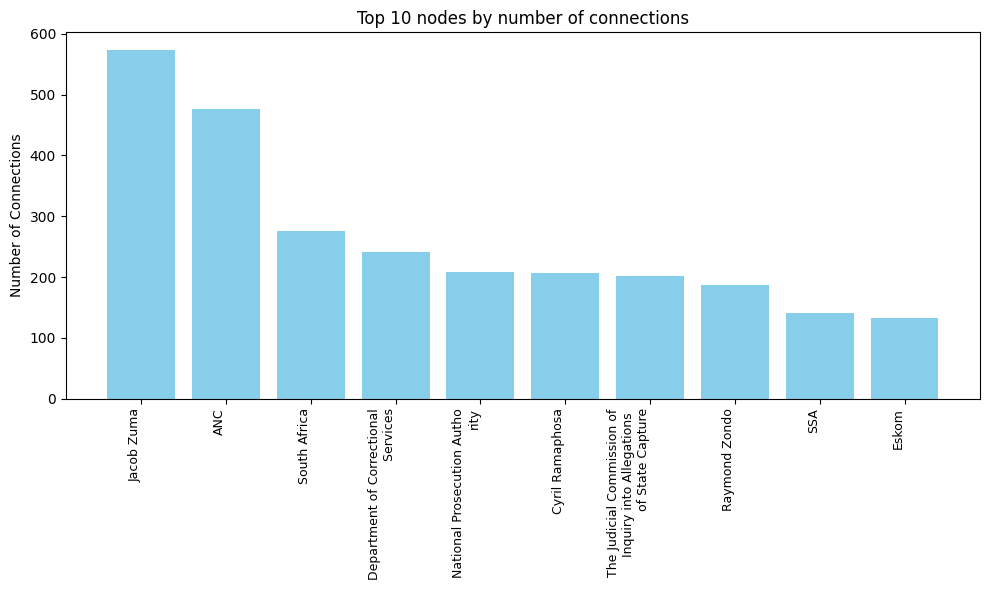

In [7]:
# Plot the top 10 nodes by number of connections
degree_dict = {node: G.in_degree(node) + G.out_degree(node) for node in G.nodes()}
sorted_nodes = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
top_10_nodes = sorted_nodes[:10]
top_10_names = [wrap_label(G.nodes[node]['name'], 26) for node, _ in top_10_nodes]

nodes, degrees = zip(*top_10_nodes)
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, degrees, color='skyblue')
plt.ylabel('Number of Connections')
plt.title('Top 10 nodes by number of connections')
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.tight_layout()
plt.savefig('top_10_nodes.png')
plt.show()


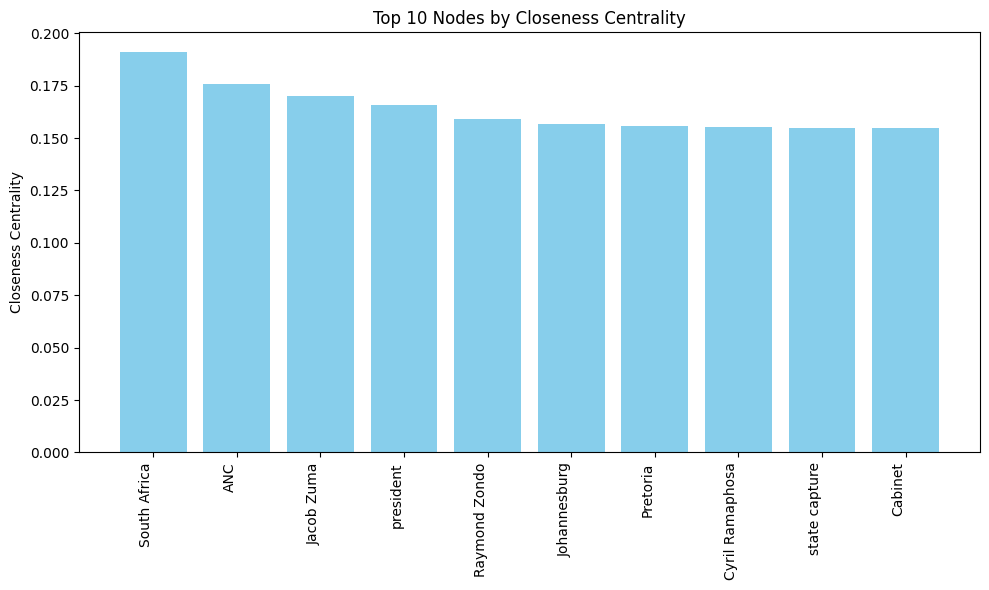

In [8]:
# Plot the top 10 nodes by closeness centrality
closeness_centrality_dict = nx.closeness_centrality(G)
sorted_nodes = sorted(closeness_centrality_dict.items(), key=lambda item: item[1], reverse=True)
top_10_nodes = sorted_nodes[:10]
top_10_names = [wrap_label(G.nodes[node]['name']) for node, _ in top_10_nodes]

nodes, centralities = zip(*top_10_nodes)
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, centralities, color='skyblue')
plt.ylabel('Closeness Centrality')
plt.title('Top 10 Nodes by Closeness Centrality')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('top_10_closeness_centrality.png')
plt.show()

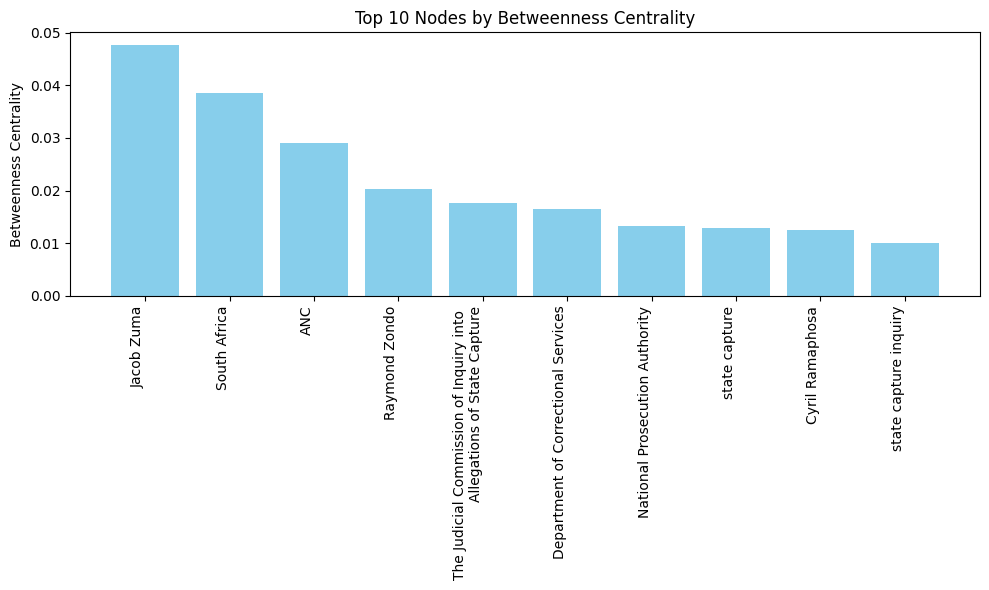

In [9]:
# Plot the top 10 nodes by betweenness centrality
betweenness_centrality_dict = nx.betweenness_centrality(G)
sorted_nodes = sorted(betweenness_centrality_dict.items(), key=lambda item: item[1], reverse=True)
top_10_nodes = sorted_nodes[:10]
top_10_names = [wrap_label(G.nodes[node]['name']) for node, _ in top_10_nodes]

nodes, centralities = zip(*top_10_nodes)
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, centralities, color='skyblue')
plt.ylabel('Betweenness Centrality')
plt.title('Top 10 Nodes by Betweenness Centrality')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('top_10_betweenness_centrality.png')
plt.show()

In [10]:
# Get a colormap for plotting the treemap
cmap = plt.get_cmap('GnBu')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors.reverse()

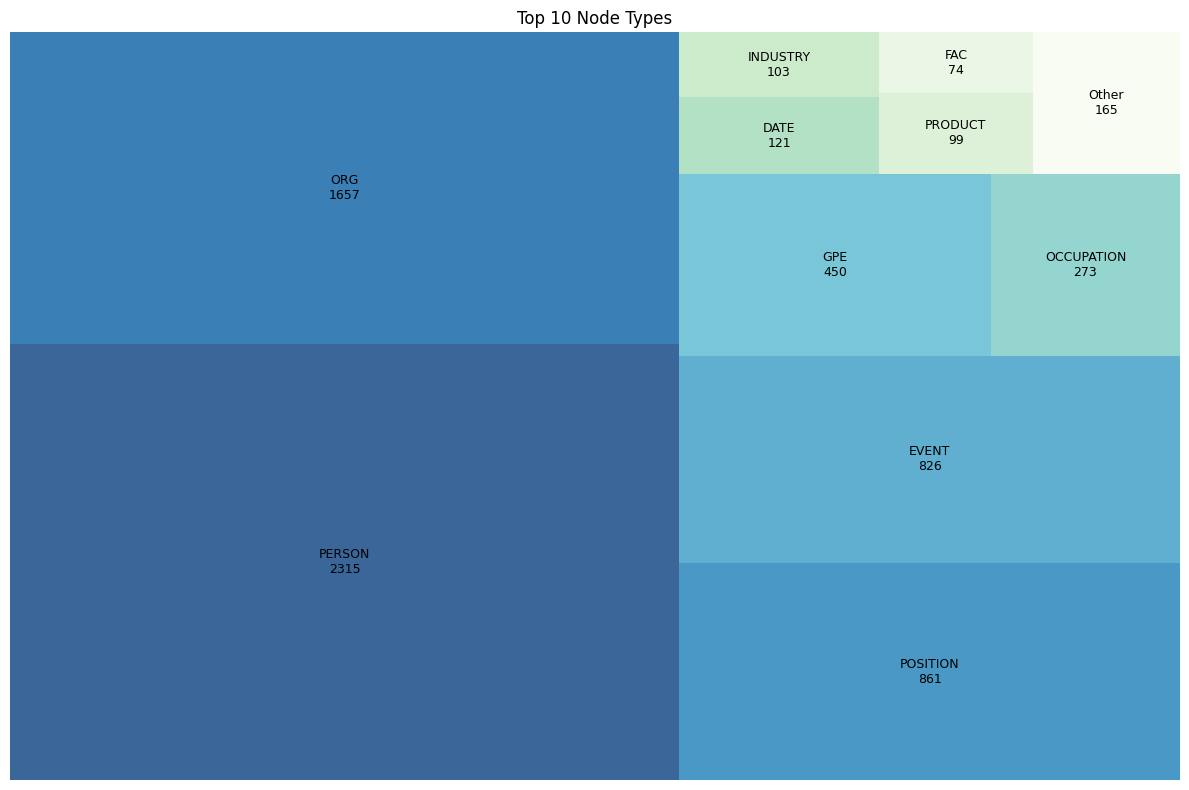

In [11]:
# Count the number of nodes per type
type_counts = {}
for node in G.nodes():
    node_type = G.nodes[node]['type']
    if node_type in type_counts:
        type_counts[node_type] += 1
    else:
        type_counts[node_type] = 1

# Sort descending
sorted_type_counts = sorted(type_counts.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 types and group the rest as 'other'
top_10_types = sorted_type_counts[:10]
other_count = sum(count for _, count in sorted_type_counts[10:])
if other_count > 0:
    top_10_types.append(('Other', other_count))

# Get data for the treemap and plot
labels, sizes = zip(*top_10_types)
labels = [f"{label}\n{size}" for label, size in top_10_types]
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=0.8, text_kwargs={'fontsize': 9})
plt.axis('off')
plt.title('Top 10 Node Types')
plt.tight_layout()
plt.savefig('top_10_node_types.png')
plt.show()

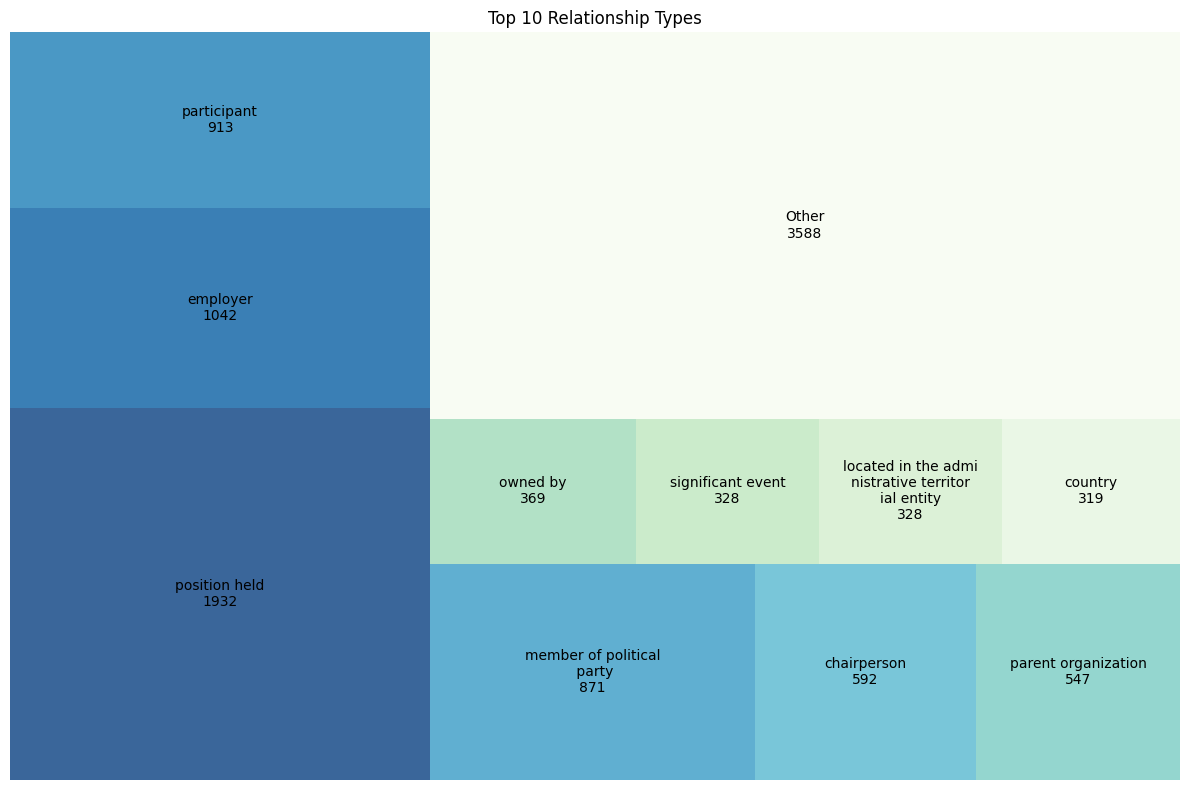

In [12]:
# # Count the number of edges per type
relation_type_counts = {}
for _, _, data in G.edges(data=True):
    relation_type = data['type']
    if relation_type in relation_type_counts:
        relation_type_counts[relation_type] += 1
    else:
        relation_type_counts[relation_type] = 1

# Sort descending
sorted_relation_type_counts = sorted(relation_type_counts.items(), key=lambda item: item[1], reverse=True)

# Get the top 10 types and group the rest as 'other'
top_10_relation_types = sorted_relation_type_counts[:10]
other_count = sum(count for _, count in sorted_relation_type_counts[10:])
if other_count > 0:
    top_10_relation_types.append(('Other', other_count))

# Get data for the treemap and plot
labels, sizes = zip(*top_10_relation_types)
labels = [f'''{wrap_label(label, width=19)}\n{size}''' for label, size in top_10_relation_types]
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=0.8, text_kwargs={'fontsize': 10})
plt.axis('off')
plt.title('Top 10 Relationship Types')
plt.tight_layout()
plt.savefig('top_10_relation_types.png')
plt.show()

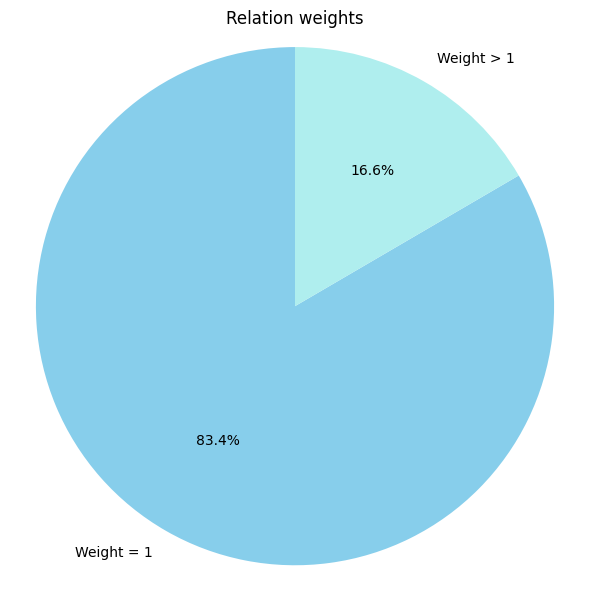

In [13]:
# Step 1: Extract the weights of all edges
weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Make a pie chart showing number of edges with weight 1 vs thos with weight > 1
weight_1_count = sum(1 for weight in weights if weight == 1)
weight_gt_1_count = sum(1 for weight in weights if weight > 1)
sizes = [weight_1_count, weight_gt_1_count]
labels = ['Weight = 1', 'Weight > 1']
colors = ['skyblue', 'paleturquoise']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Relation weights')
plt.tight_layout()
plt.savefig('edge_weights_distribution.png')
plt.show()

# Step 2: Plot the distribution of weights
# plt.figure(figsize=(10, 6))
# plt.hist(weights, bins=100, color='skyblue')
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.title('Distribution of relation weights')
# plt.tight_layout()
# plt.savefig('relation_weights_distribution.png')
# plt.show()

In [14]:
# Find the average degree of the graph
average_degree = sum(G.degree(node) for node in G.nodes()) / G.number_of_nodes()
print(f'The average degree of the graph is {average_degree:.2f}')

The average degree of the graph is 3.12
